<a href="https://colab.research.google.com/github/LucasRios/AIPhytonExamples/blob/main/DIP_Digital_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

In [6]:
#download the image
url = "https://www.cdc.gov/healthy-pets/media/images/2024/04/GettyImages-598175960-cute-dog-headshot.jpg"

response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Check if the content type indicates an image
    if 'image' in response.headers.get('Content-Type', ''):
        img_original = Image.open(BytesIO(response.content))

        #convert to numpy
        img_rgb = np.array(img_original)

        print(f"original shape:{img_rgb.shape}")
    else:
        print(f"Error: Content-Type is not an image. Content-Type: {response.headers.get('Content-Type')}")
        # Optionally, print content for debugging if it's not too large
        # print(response.text[:500])
else:
    print(f"Error: Failed to download image. Status code: {response.status_code}")
    print(f"Response text (first 500 chars): {response.text[:500]}") # Print first 500 characters of response text for debugging


original shape:(1193, 2121, 3)


In [7]:
#extracting R,G,B channels
R = img_rgb[:,:,0]
G = img_rgb[:,:,1]
B = img_rgb[:,:,2]

#apply the weightd average
img_gray = (0.299*R + 0.587 * G + 0.114 * B).astype(np.uint8)

print(f"Grayscale Image Shape: {img_gray.shape}")

Grayscale Image Shape: (1193, 2121)


In [8]:
#image binarization
#threshold value
threshold = 127

# If pixel > 127, set to 255 (White). Otherwise, set to 0 (Black)
img_binary = np.where(img_gray > threshold, 255, 0).astype(np.uint8)


print(f"Binarization complete using threshold: {threshold}")

Binarization complete using threshold: 127


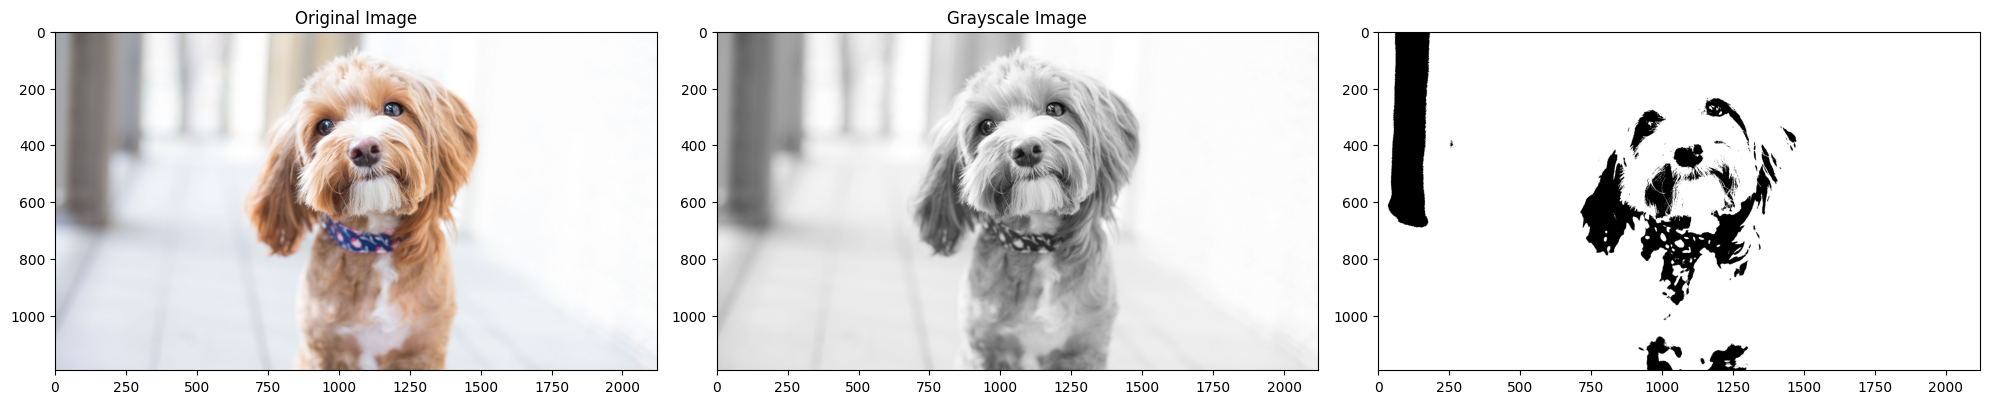

In [9]:
#result visualization

#create the figure
plt.figure(figsize=(20,20))

#subplot1: original
plt.subplot(1,3,1)
plt.imshow(img_original)
plt.title("Original Image")

#subplot2: gray
plt.subplot(1,3,2)
plt.imshow(img_gray,cmap='gray')
plt.title("Grayscale Image")

#subplot3: binary
plt.subplot(1,3,3)
plt.imshow(img_binary,cmap='gray')

plt.tight_layout()
plt.show()

